### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

np.__version__
sns.set()

### <a name='1'></a> Ćwiczenie 131
Wczytaj plik csv 'Telco-Customer-Churn.csv' do obiektu DataFrame o nazwie _df_raw_ z domyślnymi parametrami funkcji _pd.read_csv()_ i wyświetl 5 pierwszych wierszy.

- https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [8]:
url = 'Telco-Customer-Churn.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Skopiuj obiekt _df_raw_ do zmiennej _df_.

In [9]:
df = df_raw.copy()

Wyświetl podstawowe informacje na temat obiektu _df_.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Wyznacz liczbę brakujących elementów (_np.nan_) w obiekcie _df_ dla każdej zmiennej.

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### <a name='2'></a> Ćwiczenie 132
Zwróć uwagę na kolumnę _TotalCharges_. Typ tej kolumny to _object_. Spróbuj odgadnąć dlaczego tak się stało.

__Wskazówka:__
Spójrz na rozkład wartości zmiennej.

In [12]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

Zauważ, że na pierwszym miejscu mamy 11 wartości pustych. Aby lepiej to zobaczyć, patrz poniżej.

In [13]:
df['TotalCharges'].value_counts()[:3].index

Index([' ', '20.2', '19.75'], dtype='object', name='TotalCharges')

Jest to znak spacji, który wkradł się w nasze dane. Spowodował, że pandas odczytał całą kolumnę jako tekst. Jako analityk musimy z takimi problemami sobie dawać radę. Spróbuj zamienić brakujące wartości kolumny _TotalCharges_ na jej medianę.

In [14]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [15]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'].values

array([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
      dtype=object)

In [16]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'].str.replace(' ', str(1))

488     1
753     1
936     1
1082    1
1340    1
3331    1
3826    1
4380    1
5218    1
6670    1
6754    1
Name: TotalCharges, dtype: object

In [17]:
pd.to_numeric(df['TotalCharges'][df['TotalCharges'] != ' ']).median()

1397.475

In [18]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'].str.replace(' ', str(pd.to_numeric(df['TotalCharges'][df['TotalCharges'] != ' ']).median()))

488     1397.475
753     1397.475
936     1397.475
1082    1397.475
1340    1397.475
3331    1397.475
3826    1397.475
4380    1397.475
5218    1397.475
6670    1397.475
6754    1397.475
Name: TotalCharges, dtype: object

In [19]:

#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
# Obliczenie mediany dla kolumny TotalCharges
TotalChargesMedian = pd.to_numeric(df['TotalCharges'][df['TotalCharges'] != ' ']).median()

# Wypełnienie brakujących wartości medianą

df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = df.loc[df['TotalCharges'] == ' ', 'TotalCharges'].str.replace(' ', str(TotalChargesMedian))

# df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = TotalChargesMedian

# Konwersja kolumny TotalCharges do typu float
df['TotalCharges'] = df['TotalCharges'].astype('float')

Sprawdź, czy typ został poprawnie zmieniony.

In [20]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges']

Series([], Name: TotalCharges, dtype: float64)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Parametr `errors='coerce'` w funkcji `pd.to_numeric()` z biblioteki Pandas jest używany do konwersji danych na typ numeryczny (np. int, float) w sposób, który obsługuje błędy konwersji.

Gdy używasz `pd.to_numeric()` do konwersji kolumny z wartościami na liczby, Pandas standardowo stara się przekształcić wszystkie wartości w kolumnie na numeryczne typy danych. Jednak w przypadku, gdy w kolumnie znajdują się wartości, które nie mogą być przekonwertowane na liczby (np. tekst, który nie jest liczbą), może to spowodować błąd.

Parametr `errors` kontroluje sposób, w jaki funkcja `pd.to_numeric()` radzi sobie z takimi wartościami. Istnieją trzy opcje dla parametru `errors`:
1. `'raise'`: Podnosi wyjątek, gdy napotka błąd konwersji. Jest to domyślne zachowanie.
2. `'ignore'`: Ignoruje błędy konwersji, pozostawiając oryginalne, niezmienione wartości.
3. `'coerce'`: Wymusza konwersję nieprawidłowych wartości do `NaN` (Not a Number).

Użycie `errors='coerce'` w funkcji `pd.to_numeric()` oznacza, że każda wartość, której nie można przekonwertować na liczbę, zostanie zamieniona na `NaN`.

### Przykład:

```python
import pandas as pd

# Przykładowe dane
data = {'TotalCharges': ['1000', '2000', 'invalid_data', '4000']}
df = pd.DataFrame(data)

# Konwersja kolumny TotalCharges na numeryczną z obsługą błędów 'coerce'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df)
```

Wynik będzie wyglądał następująco:

```
   TotalCharges
0        1000.0
1        2000.0
2           NaN
3        4000.0
```

W powyższym przykładzie wartość `'invalid_data'` nie mogła zostać przekonwertowana na liczbę, więc została zastąpiona przez `NaN`.

### Dlaczego to jest użyteczne?

1. **Czyszczenie danych**: W wielu zestawach danych mogą występować błędne lub nieprawidłowe wartości. Użycie `errors='coerce'` pozwala na łatwe przekształcenie takich wartości na `NaN`, co umożliwia ich późniejsze łatwe usunięcie lub przetworzenie.
2. **Zachowanie ciągłości przetwarzania**: Konwersja z `errors='coerce'` pozwala na uniknięcie przerwania procesu przetwarzania danych z powodu błędów konwersji.
3. **Analiza danych**: `NaN` mogą być łatwo identyfikowane i obsługiwane w analizie danych, co jest trudniejsze do osiągnięcia, jeśli błędne wartości pozostają w oryginalnej formie.

Użycie `errors='coerce'` jest więc przydatnym narzędziem w preprocessingu danych, umożliwiającym efektywne radzenie sobie z nieprawidłowymi wartościami w zestawach danych.

In [24]:
# Rozwiązanie 2. parametr errors='coerce'

In [25]:
df = df_raw.copy()

In [26]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
df.dropna(inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### <a name='3'></a> Ćwiczenie 133
Kolumny z poniższej listy _categorical_ przekształć do typu _category_. - TO NIE

In [29]:
# categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
#                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#                'StreamingTV', 'Contract', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# for col in categorical:
#     df[col] = pd.Categorical(df[col])

Kolumnę 'tenure' przekształć do typu _float_.

In [30]:
df['tenure'] = df['tenure'].astype(float)

In [31]:
# numerical = ['tenure', 'MonthlyCharges']

# for col in numerical:
#     df[col] = df[col].astype(float)

Ustaw kolumnę _customerID_ jako indeks obiektu _df_ oraz wyświetl info o obiekcie _df_.

In [32]:
df = df.set_index('customerID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

### <a name='4'></a> Ćwiczenie 134
Użyj meteody _describe()_ do wyświetlenia podstawowych statystyk obiektu _df_.

In [33]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Zauważ, że są to tylko zmienne numeryczne. Wyświetl podstawowe statystyki zmiennych kategorycznych przekazując odpowiedni parametr _include_ metody _describe()_.

In [34]:
df.describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Zauważ, że są to nieco inne statystyki niż dla zmiennych numerycznych.

### <a name='5'></a> Ćwiczenie 135
Znajdź rozkład wartości zmiennej _Churn_.

In [35]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Zbuduj wykres kołowy rozkładu wartości zmiennej _Churn_.

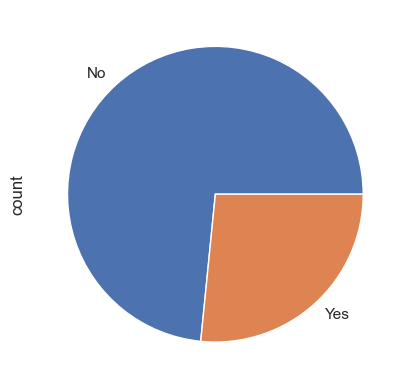

In [37]:
df['Churn'].value_counts().plot(kind='pie');

### <a name='6'></a> Ćwiczenie 136
Zbuduj wykres _pairplot()_ z biblioteki _seaborn_. Przekaż zmienne:
* tenure
* MonthlyCharges
* TotalCharges  


oraz parametr: _hue='Churn'_.

__Wskazówka:__
https://seaborn.pydata.org/generated/seaborn.pairplot.html


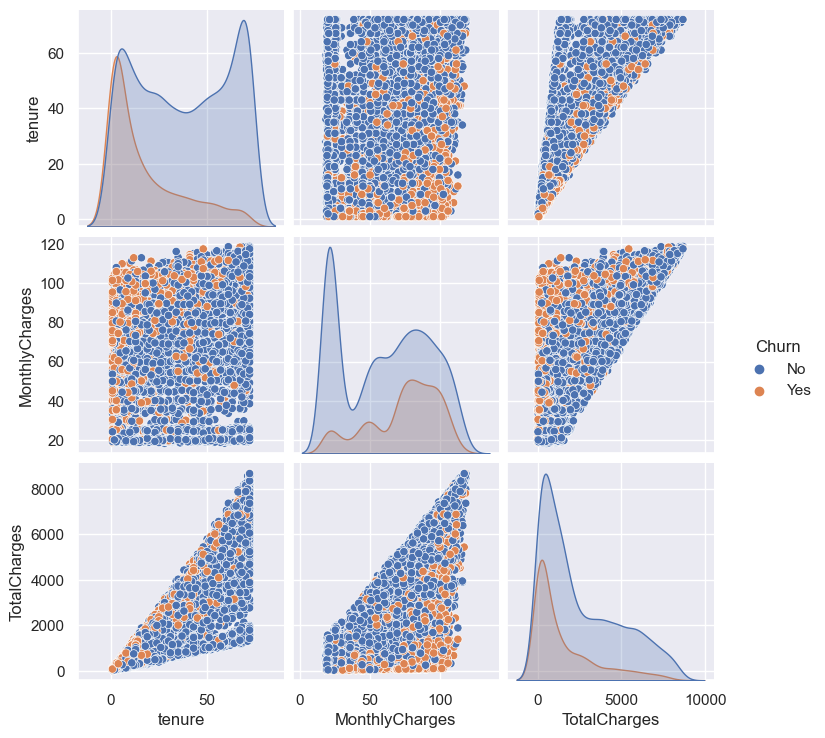

In [38]:
sns.pairplot(df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn'); #diag_kind='hist'

`seaborn.pairplot` to funkcja w bibliotece Seaborn, która służy do tworzenia par wykresów (ang. pair plots) dla każdej pary zmiennych w zbiorze danych. Wykres ten jest szczególnie przydatny do wizualizacji zależności pomiędzy zmiennymi w zbiorze danych oraz do zrozumienia rozkładu poszczególnych zmiennych. 

### Jak interpretować wykres `seaborn.pairplot`?

1. **Diagonały**:
   - Na głównej przekątnej wykresu `pairplot` znajdują się histogramy (lub wykresy gęstości) poszczególnych zmiennych. Pokazują one rozkład danych dla każdej zmiennej.
   - Histogramy umożliwiają zrozumienie, czy zmienna ma rozkład normalny, skośny, czy też ma inne cechy charakterystyczne.

2. **Wykresy poza przekątną**:
   - Każdy wykres poza główną przekątną przedstawia zależność między dwiema różnymi zmiennymi.
   - Jeśli na osi x znajduje się zmienna A, a na osi y zmienna B, to wykres w komórce (A, B) pokazuje rozkład zmiennej B względem zmiennej A.
   - Na ogół są to wykresy punktowe (scatter plots), które pokazują korelacje między zmiennymi. 

3. **Kolory i znaczniki**:
   - Kolory i znaczniki na wykresach mogą reprezentować różne klasy lub kategorie w danych, co pozwala na dodatkową analizę zależności między zmiennymi w kontekście różnych klas.

### Przykład użycia `seaborn.pairplot`

Załóżmy, że mamy zbiór danych `iris`, który zawiera informacje o różnych gatunkach irysów. Oto jak można stworzyć `pairplot` i jak go interpretować:

```python
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Załadowanie danych iris i stworzenie DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Wykres pairplot
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()
```

### Interpretacja wykresu

1. **Histogramy na przekątnej**:
   - Każdy histogram pokazuje rozkład jednej z cech (np. długości płatka, szerokości płatka) dla wszystkich gatunków.
   - Można zauważyć, jak rozkład zmienia się między różnymi gatunkami.

2. **Wykresy punktowe poza przekątną**:
   - Te wykresy pokazują zależność między dwiema różnymi cechami.
   - Można zidentyfikować korelacje i wzorce między zmiennymi. Na przykład, jeśli punkty układają się w linię, może to sugerować liniową korelację między zmiennymi.
   - Kolory reprezentują różne gatunki, co pomaga w identyfikacji, jak różne gatunki grupują się względem cech.

3. **Interpretacja kolorów i markerów**:
   - Różne kolory i markery pokazują, jak klasy (gatunki) są rozmieszczone względem zmiennych.
   - Pozwala to na zrozumienie, które cechy najlepiej różnicują gatunki.

### Wskazówki

- **Korelacje**: Szukaj wykresów punktowych, gdzie dane układają się w wyraźne wzorce, takie jak linie proste lub inne kształty, które mogą sugerować zależności.
- **Różnice między klasami**: Zwracaj uwagę na to, jak kolory (klasy) są rozmieszczone na wykresach, co może pomóc zrozumieć, które cechy są najlepsze do klasyfikacji.
- **Rozkład zmiennych**: Histogramy na przekątnej pomagają zrozumieć rozkład poszczególnych zmiennych, co jest kluczowe w preprocessingu danych, takim jak normalizacja czy standaryzacja.

`seaborn.pairplot` jest potężnym narzędziem do eksploracyjnej analizy danych, pomagającym w szybkim zrozumieniu złożonych relacji w zbiorze danych.

In [39]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
# import pandas as pd

# # Załadowanie danych iris i stworzenie DataFrame
# iris = load_iris()
# df2 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# df2['species'] = iris.target

# # Wykres pairplot
# sns.pairplot(df2, hue='species', diag_kind='hist')
# plt.show()

### <a name='7'></a> Ćwiczenie 137
Dokonaj mapowania kolumny _Churn_ odpowiednio:
* 'Yes' -> 1
* 'No' -> 0

Wyświetl 5 pierwszych wierszy obiektu _df_.

In [40]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### <a name='8'></a> Ćwiczenie 138
Wyznacz macierz korelacji dla obiektu _df_.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [42]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


### <a name='9'></a> Ćwiczenie 139
Znajdź rozkład zmiennej _PaymentMethod_.

In [43]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

Pogrupuj dane po zmiennej _PaymentMethod_ i policz średnią wartość dla zmiennej _TotalCharges_.

In [44]:
df.groupby('PaymentMethod')['TotalCharges'].mean()

PaymentMethod
Bank transfer (automatic)    3079.299546
Credit card (automatic)      3071.396022
Electronic check             2090.868182
Mailed check                 1054.483915
Name: TotalCharges, dtype: float64

### <a name='10'></a> Ćwiczenie 140
Pobierz próbkę 10-ciu wierszy z obiektu _df_ i zapisz do pliku _sample_10.csv_.

In [45]:
df.sample(10).to_csv('sample_10.csv')